In [1]:
from pprint import pprint
from blindml.frontend.config.task.task import parse_task_capsule
from blindml.frontend.reporting.metrics import plot_trial_record
import warnings
warnings.filterwarnings("ignore")

```
{
  user: 'max',
  access_token: '1234567',
  task: {
    type: 'regression',
    payload: {
      y_col: 'EA',
      drop_cols: [
        'inchi_key',
        'wall_time_neutral',
        'EA_wall_time',
        'IP_wall_time',
        'xyz_neutral',
        'xyz_reduced',
        'xyz_oxidized',
        'smiles',
        'inchi',
      ],
      data_path: "/Users/maksim/dev_projects/blindml/data/xtb-redox.csv"
    },
  },
  dos: {
    metric: 'accuracy',
    range: [0.8, 1],
  },
  trust_constraints: {
    freshness: 'last_week',
    user: 'all_groups',
  },
}
```

In [9]:
!nnictl  stop
!rm -rf ~/nni-experiments/maxs_experiment_*
!rm -rf  ~/.local/nnictl/maxs_experiment*

INFO:  Stopping experiment maxs_experiment_bd41ddb529ac1489f8290a406f9a4628
INFO:  Stop experiment success.


In [2]:
task_file_fp = "/Users/maksim/dev_projects/blindml/tests/task.jsonnet"
task = parse_task_capsule(task_file_fp)

In [3]:
print(task)

{ 'access_token': '1234567',
  'dos': { 'metric': 'accuracy',
           'range': [0.8, 1]},
  'task': { 'payload': { 'data_path': '/Users/maksim/dev_projects/blindml/data/xtb-redox.csv',
                         'drop_cols': [ 'inchi_key',
                                        'wall_time_neutral',
                                        'EA_wall_time',
                                        'IP_wall_time',
                                        'xyz_neutral',
                                        'xyz_reduced',
                                        'xyz_oxidized',
                                        'smiles',
                                        'inchi'],
                         'y_col': 'EA'},
            'type': 'regression'},
  'trust_constraints': { 'freshness': 'last_week',
                         'user': 'all_groups'},
  'user': 'max'}


In [5]:
task.search_for_model()

INFO:  Starting restful server...
INFO:  Successfully started Restful server!
INFO:  Setting local config...
INFO:  Successfully set local config!
INFO:  Starting experiment...


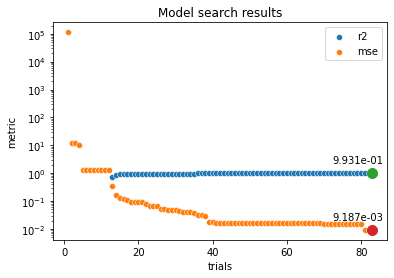

In [4]:
metric_values = task.get_model_search_update()
plot_trial_record(metric_values)

In [5]:
res = task.train_best_model()
print(res["hyper_parameters"]['task_type']['model'])

None
{'_name': 'KernelRidgeRegression', 'alpha': 1e-06, 'kernel': 'polynomial'}


In [6]:
task.save_model(res, "/Users/maksim/dev_projects/blindml/tests")

In [7]:
!ls /Users/maksim/dev_projects/blindml/tests

maxs_experiment.joblib run.sh                 test_backend.py
nni_config.yml         task.jsonnet           test_task_capsule.py


In [8]:
res = task.load_model("/Users/maksim/dev_projects/blindml/tests")
pprint(res["scores"])

{'Metric.MSE': 0.009186715762124752, 'Metric.R2': 0.9930906394169245}
